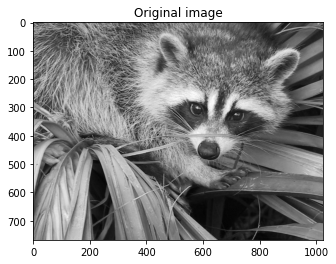

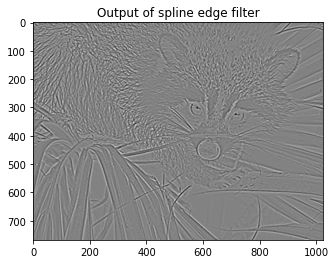

In [9]:
import numpy as np
from scipy import signal, misc
import matplotlib.pyplot as plt
image = misc.face(gray=True).astype(np.float32)
#得到一张浣熊的1024×768图像
derfilt = np.array([1.0, -2, 1.0], dtype=np.float32)
ck = signal.cspline2d(image, 8.0)
#参数二指定传递函数中的平滑量
#返回值是滤波后的信号
deriv = (signal.sepfir2d(ck, derfilt, [1]) +
         signal.sepfir2d(ck, [1], derfilt))
#参数二定义过滤器行方向的秩1数组，参数三定义过滤器列方向的秩1数组
#返回值是滤波后的信号
laplacian = np.array([[0,1,0], [1,-4,1], [0,1,0]], dtype=np.float32)
deriv2 = signal.convolve2d(ck,laplacian,mode='same',boundary='symm')
#参数一二有相同的维度，参数三指示输出大小的字符串，可选项很多
#参数四表示如何处理边界，可选项很多
plt.figure()
plt.imshow(image)
plt.gray()
plt.title('Original image')
plt.figure()
plt.imshow(deriv)
plt.gray()
plt.title('Output of spline edge filter')
plt.show()

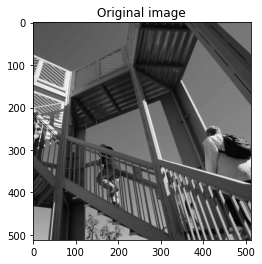

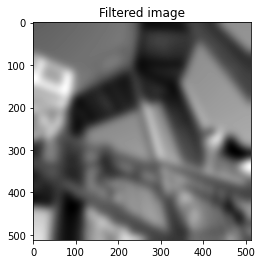

In [10]:
image = misc.ascent()
w = signal.windows.gaussian(51, 10.0)
#参数一是输出窗口的点数，参数二是标准差 sigma
#返回一个高斯窗口
image_new = signal.sepfir2d(image, w, w)
plt.figure()
plt.imshow(image)
plt.gray()
plt.title('Original image')
plt.figure()
plt.imshow(image_new)
plt.gray()
plt.title('Filtered image')
plt.show()

下面这个就像是我们学习信号与系统时看过的系统函数了

$$H(z)=k\frac{(z-z_{1})(z-z_{2})...(z-z_{n})}{(z-p_{1})(z-p_{2})...(z-p_{n})}$$

例子是：

$$H(z)=\frac{\frac{1}{2}z+\frac{1}{4}}{z-\frac{1}{3}}$$

In [11]:
b = np.array([1.0/2, 1.0/4])
a = np.array([1.0, -1.0/3])
signal.tf2zpk(b, a)
#参数一是分子多项式系数
#参数二是分母多项式系数
#从线性滤波器的分子、分母表示返回零(分子上)、极点(分母上)、增益（z、p、k）表示
#根据上面的公式我们可以得出如下结果的零极点
#注意系数数组最后一个是0次幂的系数

(array([-0.5]), array([0.33333333]), 0.5)